# Feed-forward Neural Networks
### From scratch

 ![](ff.png)
  ![](net.png)

## Imports

In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

## 1. Forward step

$ \large n_{1i} = w_{1i} x_i + b_i $  

$ \large a_{1i} = \tanh(n_{1i}) $   

$ \large n_{2i} = w_{2i} a_{1i} + b_i $  

$ \large y_i = \exp(n_{2i}) $   

$ \large y_{ip} = \frac{y_i}{\sum_{j=1}^n{y_j}} $   




In [2]:
def ForwardStep(X, model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    n1 = X.dot(W1) + b1
    a1 = np.tanh(n1)
    n2 = a1.dot(W2) + b2
    y = np.exp(n2)
    py = y / np.sum(y, axis=1, keepdims=True)
    return py, a1

## 2. Backward step

$ \large w^{(i+1)} = w^{(i)} - \nabla w^{(i)} $ 
  
$ \large \nabla w = \mu \frac{\partial L}{\partial w} =  \mu \frac{\partial L}{\partial y} \frac{\partial y}{\partial w}$ 
  
 $ \large \frac{\partial y}{\partial w}  = x \qquad \large \frac{\partial L}{\partial y} = \frac{\partial (y - \hat{y})^2}{\partial y} = -2 (y - \hat{y}) $

### Output layer:  

$ \large d_2 = 1 - y_{ip}$   

$ \large d_{2w} = a_2^t d_2 $   

$ \large d_{2b} = \sum_{j=1}^n d_{2j} $   

$ \large w_{2}^{(i+1)} = w_{2}^{(i)} - m . d_{2w} + \lambda w_{2i} $  

$ \large b_{2}^{(i+1)} = b_{2}^{(i)} - m . d_{2b} $  

  
  
### Hidden layer:  

$ \large d_1= w_2 d_2 . (1 - a_1^2)$   

$ \large d_{1w} = x_i d_1 $   

$ \large d_{1b} = \sum_{j=1}^n d_{1j} $   

$ \large w_{1}^{(i+1)} = w_{1}^{(i)} - m . d_{1w} + \lambda w_{1i} $  

$ \large b_{1}^{(i+1)} = b_{1}^{(i)} - m . d_{1b} $  

  

  ![](learningRate.png)

In [3]:
def BackwardStep(X, y, nExamples, py, a1, model, m, Lambda):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Output to hidden layer
    d2 = py
    d2[range(nExamples), y] -= 1
    dW2 = (a1.T).dot(d2)
    db2 = np.sum(d2, axis=0, keepdims=True)
 
    # Hidden layer
    d1 = d2.dot(W2.T) * (1 - np.power(a1, 2))
    dW1 = np.dot(X.T, d1)
    db1 = np.sum(d1, axis=0)

    # Add regularization terms (only Ws)
    dW1 += Lambda * W1
    dW2 += Lambda * W2
  
    # Gradient descent parameter update
    W1 -= m * dW1
    b1 -= m * db1
    W2 -= m * dW2
    b2 -= m * db2
    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return(model)

## 3. Loss function

Cross entropy loss function: 
  
$ \large l = -\log[ \; P(y|x) \; ]$  

Optionally with a regularization term:  
  

$ \large l = \sum_{j+1}^n{[\; -\log(y_{jp}) \; ]} \; + \; \lambda \frac{1}{2} \; (\sum_{j=1}^n {w_{2j}}^2 + \sum_{j=1}^n {w_{1j}}^2)$

In [12]:
def CalcLoss(model, X, y, Lambda):
    nExamples = len(X) 
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    py, a1 = ForwardStep(X, model)
    
    # Calculating the loss
    logPy = -np.log(py[range(nExamples), y])
    loss = np.sum(logPy)
    
    # Add regulatization to loss
    loss += Lambda / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1. / (nExamples * loss)

![](actloss.png)

## 4. Build the model

In [13]:
def BuildModel(X, y, nInp, nHid, nOut, epochs, m, Lambda, printLoss=False):
    
    # Initialize 
    nExamples = len(X)
    np.random.seed(0)
    W1 = np.random.randn(nInp, nHid) / np.sqrt(nInp)
    b1 = np.zeros((1, nHid))
    W2 = np.random.randn(nHid, nOut) / np.sqrt(nHid)
    b2 = np.zeros((1, nOut))
    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
     
    # Train
    for i in range(0, epochs):

        py, a1 = ForwardStep(X, model)
        model = BackwardStep(X, y, nExamples, py, a1, model, m, Lambda)
        
        if printLoss and i % 1000 == 0: print("Loss after iteration %i: %f" % (i, CalcLoss(model, X, y, Lambda)))

    return model

## 5. Predict

In [14]:
def Predict(model, X):
    py, a1 = ForwardStep(X, model)
    return np.argmax(py, axis=1)

## Test


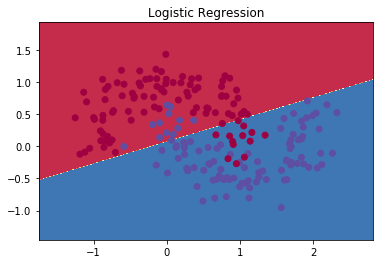

Loss after iteration 0: 0.000057
Loss after iteration 1000: 0.000392
Loss after iteration 2000: 0.000401
Loss after iteration 3000: 0.000406
Loss after iteration 4000: 0.000409
Loss after iteration 5000: 0.000411
Loss after iteration 6000: 0.000412
Loss after iteration 7000: 0.000413
Loss after iteration 8000: 0.000414
Loss after iteration 9000: 0.000411
Loss after iteration 10000: 0.000411
Loss after iteration 11000: 0.000411
Loss after iteration 12000: 0.000411
Loss after iteration 13000: 0.000411
Loss after iteration 14000: 0.000411
Loss after iteration 15000: 0.000411
Loss after iteration 16000: 0.000411
Loss after iteration 17000: 0.000411
Loss after iteration 18000: 0.000411
Loss after iteration 19000: 0.000411


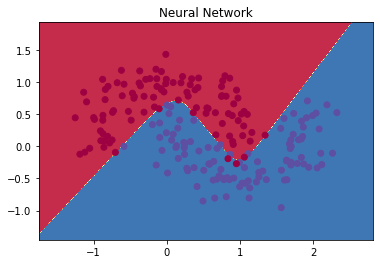

In [15]:
def plot_decision_boundary(predFunc, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = predFunc(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Generate data
X, y = datasets.make_moons(200, noise=0.20)

# Logistic Regression
lr = linear_model.LogisticRegressionCV()
lr.fit(X, y)
plot_decision_boundary(lambda x: lr.predict(x), X, y)
plt.title("Logistic Regression")
plt.show()

# Neural Networks
nn = BuildModel(X=X, y=y, nInp=2, nHid=3, nOut=2, epochs=20000, m=0.01, Lambda=0.01, printLoss=True)
plot_decision_boundary(lambda x:Predict(nn,x), X, y)
plt.title("Neural Network")
plt.show()

## Credits & Links

Practical Data Science. Andreas Vermeulen
https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8  
https://medium.com/yottabytes/everything-you-need-to-know-about-gradient-descent-applied-to-neural-networks-d70f85e0cc14  
https://peterroelants.github.io/posts/neural-network-implementation-part01/  
https://blogs.cuit.columbia.edu/zp2130/derivative_of_tanh_function/  